# Ridge Regression (scikit-learn)

## Import Modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model

## Import Data type for CSV Files.

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 
              'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 
              'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

## Load Data from CSV Files

In [3]:
sales = pd.read_csv("kc_house_data.csv", dtype = dtype_dict)
train_data = pd.read_csv("kc_house_train_data.csv", dtype = dtype_dict)
test_data = pd.read_csv("kc_house_test_data.csv", dtype = dtype_dict)
valid_data = pd.read_csv("kc_house_valid_data.csv", dtype = dtype_dict)
set1 = pd.read_csv("kc_house_set_1_data.csv", dtype = dtype_dict)
set2 = pd.read_csv("kc_house_set_2_data.csv", dtype = dtype_dict)
set3 = pd.read_csv("kc_house_set_3_data.csv", dtype = dtype_dict)
set4 = pd.read_csv("kc_house_set_4_data.csv", dtype = dtype_dict)
train_valid_shuffled = pd.read_csv("kc_house_train_valid_shuffled.csv", dtype = dtype_dict)

## Polynomial Regression Function

It contains the powers of a given input.

In [4]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x ** power)
    return poly_dataframe

Following function will be used to generate Ridge Regression Model:

In [5]:
def ridge_model(alpha,x,y):
    model = linear_model.Ridge(alpha = alpha, normalize = True)
    model.fit(x,y)
    return model

And following function will visualize the polynomial regression line:

In [6]:
def plot_fitted_line(n,set_data,model):
    plt.figure(n)
    plt.plot(set_data['power_1'], set_data['price'],'.',
             set_data['power_1'], model.predict(set_data.drop('price',1)),'-')
    plt.show()

The 15th-order polynomial model with 'sqft_living' input will be employed. First, we will sort by the values of `sqft_living`.

In [7]:
sales = sales.sort_values(['sqft_living','price'])

Generate polynomial features up to degree 15 using `polynomial_dataframe()` and fit af model with these features. When fitting the model, use an L2 penalty of 1e-5:

In [8]:
sales_data = polynomial_dataframe(sales['sqft_living'], 15)
sales_data['price'] = sales['price']

In [9]:
sales_data.head(5)

power_1   power_2     power_3       power_4       power_5  \
19452    290.0   84100.0  24389000.0  7.072810e+09  2.051115e+12   
15381    370.0  136900.0  50653000.0  1.874161e+10  6.934396e+12   
860      380.0  144400.0  54872000.0  2.085136e+10  7.923517e+12   
18379    384.0  147456.0  56623104.0  2.174327e+10  8.349416e+12   
4868     390.0  152100.0  59319000.0  2.313441e+10  9.022420e+12   

            power_6       power_7       power_8       power_9      power_10  \
19452  5.948233e+14  1.724988e+17  5.002464e+19  1.450715e+22  4.207072e+24   
15381  2.565726e+15  9.493188e+17  3.512479e+20  1.299617e+23  4.808584e+25   
860    3.010936e+15  1.144156e+18  4.347792e+20  1.652161e+23  6.278212e+25   
18379  3.206176e+15  1.231172e+18  4.727699e+20  1.815436e+23  6.971275e+25   
4868   3.518744e+15  1.372310e+18  5.352009e+20  2.087284e+23  8.140406e+25   

           power_11      power_12      power_13      power_14      power_15  \
19452  1.220051e+27  3.538148e+29  1.026063e+32  2.975582e+34  8.629189e+36   
15381  1.779176e+28  6.582952e+30  2.435692e+33  9.012061e+35  3.334463e+38   
860    2.385721e+28  9.065738e+30  3.444980e+33  1.309093e+36  4.974552e+38   
18379  2.676970e+28  1.027956e+31  3.947353e+33  1.515783e+36  5.820608e+38   
4868   3.174758e+28  1.238156e+31  4.828807e+33  1.883235e+36  7.344616e+38   

          price  
19452  142000.0  
15381  276000.0  
860    245000.0  
18379  265000.0  
4868   228000.0

In [10]:
l2_small_penalty = 1e-5

In [11]:
model1 = ridge_model(l2_small_penalty, sales_data.drop('price',1), sales_data['price'])

In [12]:
print("Intercept of model1: ", model1.intercept_)
coeffs = pd.DataFrame(list(zip(sales_data.drop('price',1).columns,model1.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept of model1:  194587.105843


features  estimated coefficients
0    power_1            1.744255e+02
1    power_2           -7.836441e-02
2    power_3            3.732804e-05
3    power_4           -2.855543e-09
4    power_5           -2.374876e-13
5    power_6            9.705297e-18
6    power_7            1.777918e-21
7    power_8            9.769932e-26
8    power_9            7.788973e-31
9   power_10           -3.838337e-34
10  power_11           -4.529401e-38
11  power_12           -3.166941e-42
12  power_13           -1.241025e-46
13  power_14            4.534565e-51
14  power_15            1.634259e-54

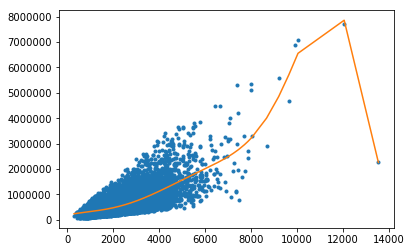

In [13]:
plot_fitted_line(0,sales_data,model1)

## Observe Overfitting

Model above shows *high variance*. We will apply same process to `set1`, `set2`, `set3`, `set4`.

Fit a 15th degree polynomial on `set1`, `set_2`, `set_3`, and `set_4`, using 'sqft_living' to predict prices. Print the weights and make a plot of the resulting model.

### Set 1

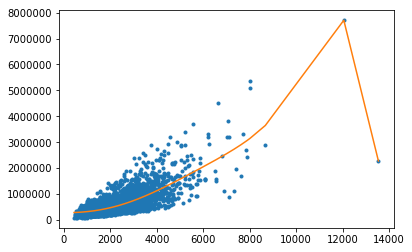

In [14]:
poly_set1 = polynomial_dataframe(set1['sqft_living'],15)
poly_set1['price'] = set1['price']
model_set1 = ridge_model(l2_small_penalty,poly_set1.drop('price',1),poly_set1['price'])
plot_fitted_line(1,poly_set1,model_set1)

In [15]:
print("Intercepts: ", model_set1.intercept_)
coeffs = pd.DataFrame(list(zip(poly_set1.drop('price',1).columns,model_set1.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercepts:  280915.35559


features  estimated coefficients
0    power_1            1.351065e+00
1    power_2            3.192342e-02
2    power_3            1.070864e-05
3    power_4           -1.289705e-09
4    power_5           -4.471555e-14
5    power_6            3.810416e-18
6    power_7            4.242484e-22
7    power_8            1.960170e-26
8    power_9            1.490480e-31
9   power_10           -6.135032e-35
10  power_11           -6.828401e-39
11  power_12           -4.677090e-43
12  power_13           -2.101842e-47
13  power_14           -8.893177e-53
14  power_15            1.165025e-55

### Set 2

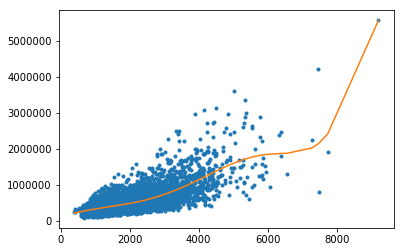

In [16]:
poly_set2 = polynomial_dataframe(set2['sqft_living'],15)
poly_set2['price'] = set2['price']
model_set2 = ridge_model(l2_small_penalty,poly_set2.drop('price',1),poly_set2['price'])
plot_fitted_line(2,poly_set2,model_set2)

In [17]:
print("Intercepts: ", model_set2.intercept_)
coeffs = pd.DataFrame(list(zip(poly_set2.drop('price',1).columns,model_set2.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercepts:  102941.940204


features  estimated coefficients
0    power_1            3.068119e+02
1    power_2           -1.103370e-01
2    power_3            2.084905e-05
3    power_4            2.986697e-09
4    power_5           -2.428115e-13
5    power_6           -6.079773e-17
6    power_7           -3.772688e-21
7    power_8            1.490400e-25
8    power_9            5.571168e-29
9   power_10            6.437053e-33
10  power_11            4.258675e-37
11  power_12            4.823190e-42
12  power_13           -3.038374e-45
13  power_14           -4.576350e-49
14  power_15           -2.769928e-53

### Set 3

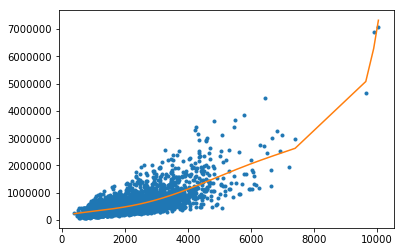

In [18]:
poly_set3 = polynomial_dataframe(set3['sqft_living'],15)
poly_set3['price'] = set3['price']
model_set3 = ridge_model(l2_small_penalty,poly_set3.drop('price',1),poly_set3['price'])
plot_fitted_line(3,poly_set3,model_set3)

In [19]:
print("Intercepts: ", model_set3.intercept_)
coeffs = pd.DataFrame(list(zip(poly_set3.drop('price',1).columns,model_set3.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercepts:  155484.983029


features  estimated coefficients
0    power_1            2.242702e+02
1    power_2           -8.507051e-02
2    power_3            2.916603e-05
3    power_4           -3.277066e-10
4    power_5           -3.220031e-13
5    power_6           -1.370289e-17
6    power_7            1.458170e-21
7    power_8            2.514997e-25
8    power_9            1.672965e-29
9   power_10           -2.473417e-35
10  power_11           -1.503546e-37
11  power_12           -2.087356e-41
12  power_13           -1.523391e-45
13  power_14            1.367733e-50
14  power_15            2.670182e-53

### Set 4

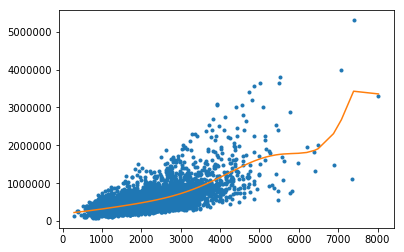

In [20]:
poly_set4 = polynomial_dataframe(set4['sqft_living'],15)
poly_set4['price'] = set4['price']
model_set4 = ridge_model(l2_small_penalty,poly_set4.drop('price',1),poly_set4['price'])
plot_fitted_line(4,poly_set4,model_set4)

In [21]:
print("Intercepts: ", model_set4.intercept_)
coeffs = pd.DataFrame(list(zip(poly_set4.drop('price',1).columns,model_set4.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercepts:  196865.473606


features  estimated coefficients
0    power_1            8.308103e+01
1    power_2            5.569394e-02
2    power_3           -1.936086e-05
3    power_4            1.404462e-09
4    power_5            8.526115e-13
5    power_6            4.411946e-17
6    power_7           -1.316107e-20
7    power_8           -2.978092e-24
8    power_9           -2.787749e-28
9   power_10            1.303589e-33
10  power_11            5.159586e-36
11  power_12            9.973028e-40
12  power_13            1.046768e-43
13  power_14            6.913024e-49
14  power_15           -2.732726e-51

## Applying Ridge Regression

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights.

Now, we will use new l2 penalty to fit a 15th-order polynomial model on `set_1`, `set_2`, `set_3`, `set_4`. Other than the change in the `l2_penalty` parameter, the code should be the same as the experiment above.

In [22]:
l2_new_penalty = 1.5e1

### Set 1

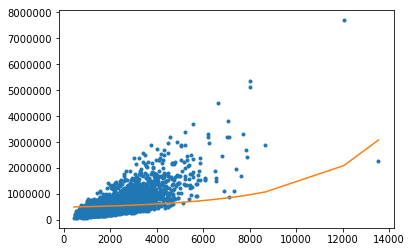

In [23]:
poly_set1 = polynomial_dataframe(set1['sqft_living'],15)
poly_set1['price'] = set1['price']
model_set1_ridge = ridge_model(l2_new_penalty,poly_set1.drop('price',1),poly_set1['price'])
plot_fitted_line(5,poly_set1,model_set1_ridge)

In [24]:
print("Intercepts: ", model_set1_ridge.intercept_)
coeffs = pd.DataFrame(list(zip(poly_set1.drop('price',1).columns,model_set1_ridge.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercepts:  494186.735275


features  estimated coefficients
0    power_1            1.652041e+01
1    power_2            2.439642e-03
2    power_3            2.158483e-07
3    power_4            1.180413e-11
4    power_5            5.794560e-16
5    power_6            2.973095e-20
6    power_7            1.620340e-24
7    power_8            9.214263e-29
8    power_9            5.357273e-33
9   power_10            3.131893e-37
10  power_11            1.815512e-41
11  power_12            1.029159e-45
12  power_13            5.602767e-50
13  power_14            2.839773e-54
14  power_15            1.247653e-58

### Set 2

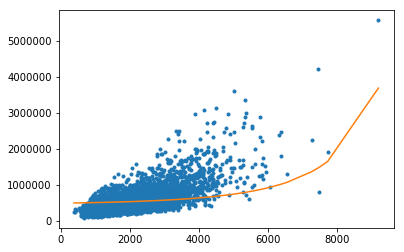

In [25]:
poly_set2 = polynomial_dataframe(set2['sqft_living'],15)
poly_set2['price'] = set2['price']
model_set2_ridge = ridge_model(l2_new_penalty,poly_set2.drop('price',1),poly_set2['price'])
plot_fitted_line(6,poly_set2,model_set2_ridge)

In [26]:
print("Intercepts: ", model_set2_ridge.intercept_)
coeffs = pd.DataFrame(list(zip(poly_set2.drop('price',1).columns,model_set2_ridge.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercepts:  484011.397415


features  estimated coefficients
0    power_1            1.418422e+01
1    power_2            2.571240e-03
2    power_3            4.198745e-07
3    power_4            5.250084e-11
4    power_5            5.282995e-15
5    power_6            4.809461e-19
6    power_7            4.323357e-23
7    power_8            3.994692e-27
8    power_9            3.830530e-31
9   power_10            3.796897e-35
10  power_11            3.860708e-39
11  power_12            3.998292e-43
12  power_13            4.194527e-47
13  power_14            4.440417e-51
14  power_15            4.731047e-55

### Set 3

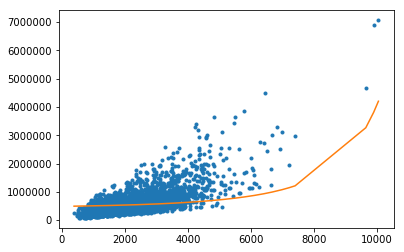

In [27]:
poly_set3 = polynomial_dataframe(set3['sqft_living'],15)
poly_set3['price'] = set3['price']
model_set3_ridge = ridge_model(l2_new_penalty,poly_set3.drop('price',1),poly_set3['price'])
plot_fitted_line(7,poly_set3,model_set3_ridge)

In [28]:
print("Intercepts: ", model_set3_ridge.intercept_)
coeffs = pd.DataFrame(list(zip(poly_set3.drop('price',1).columns,model_set3_ridge.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercepts:  486660.523111


features  estimated coefficients
0    power_1            1.540384e+01
1    power_2            2.660906e-03
2    power_3            3.674165e-07
3    power_4            3.651180e-11
4    power_5            3.130455e-15
5    power_6            2.673344e-19
6    power_7            2.377506e-23
7    power_8            2.201424e-27
8    power_9            2.099658e-31
9   power_10            2.042375e-35
10  power_11            2.011769e-39
11  power_12            1.997314e-43
12  power_13            1.992691e-47
13  power_14            1.994023e-51
14  power_15            1.998879e-55

### Set 4

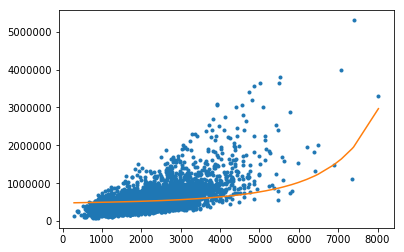

In [29]:
poly_set4 = polynomial_dataframe(set4['sqft_living'],15)
poly_set4['price'] = set4['price']
model_set4_ridge = ridge_model(l2_new_penalty,poly_set4.drop('price',1),poly_set4['price'])
plot_fitted_line(8,poly_set4,model_set4_ridge)

In [30]:
print("Intercepts: ", model_set4_ridge.intercept_)
coeffs = pd.DataFrame(list(zip(poly_set4.drop('price',1).columns,model_set4_ridge.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercepts:  478192.223481


features  estimated coefficients
0    power_1            1.392595e+01
1    power_2            2.631151e-03
2    power_3            4.657011e-07
3    power_4            6.666547e-11
4    power_5            8.017007e-15
5    power_6            8.814751e-19
6    power_7            9.436279e-23
7    power_8            1.014969e-26
8    power_9            1.109419e-30
9   power_10            1.234153e-34
10  power_11            1.393831e-38
11  power_12            1.592697e-42
12  power_13            1.835576e-46
13  power_14            2.128401e-50
14  power_15            2.478586e-54

## Selecting an L2 penalty via corss-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

* Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
* Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
* Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

In [31]:
def k_fold_cross_validation(k, l2_penalty, data):    
    rss_sum = 0
    n = len(data)
    for i in range(k):
        start = int((n*i)/k)
        end = int((n*(i+1))/k-1)
        validation_set = data[start:end+1]
        training_set = data[0:start].append(data[end+1:n])    
        model = linear_model.Ridge(alpha = l2_penalty)
        model.fit(training_set.drop('price',1),training_set['price'])
        predictions = model.predict(validation_set.drop('price',1))
        residuals = validation_set['price'] - predictions
        rss = sum(residuals * residuals)
        rss_sum += rss
    validation_error = rss_sum / k # average = sum / size or you can use np.mean(list_of_validation_error)
    return validation_error

* We will again be aiming to fit a 15th-order polynomial model using the sqft_living input
* Run 10-fold cross-validation with l2_penalty
* Report which L2 penalty produced the lowest average validation error.

In [32]:
poly_data = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
poly_data['price'] = train_valid_shuffled['price']

In [33]:
poly_data.head(5)

power_1    power_2       power_3       power_4       power_5       power_6  \
0   2800.0  7840000.0  2.195200e+10  6.146560e+13  1.721037e+17  4.818903e+20   
1   2490.0  6200100.0  1.543825e+10  3.844124e+13  9.571869e+16  2.383395e+20   
2   2340.0  5475600.0  1.281290e+10  2.998220e+13  7.015834e+16  1.641705e+20   
3   1320.0  1742400.0  2.299968e+09  3.035958e+12  4.007464e+15  5.289853e+18   
4   1904.0  3625216.0  6.902411e+09  1.314219e+13  2.502273e+16  4.764328e+19   

        power_7       power_8       power_9      power_10      power_11  \
0  1.349293e+24  3.778020e+27  1.057846e+31  2.961968e+34  8.293509e+37   
1  5.934654e+23  1.477729e+27  3.679545e+30  9.162067e+33  2.281355e+37   
2  3.841590e+23  8.989320e+26  2.103501e+30  4.922192e+33  1.151793e+37   
3  6.982606e+21  9.217040e+24  1.216649e+28  1.605977e+31  2.119890e+34   
4  9.071281e+22  1.727172e+26  3.288535e+29  6.261371e+32  1.192165e+36   

       power_12      power_13      power_14      power_15     price  
0  2.322183e+41  6.502111e+44  1.820591e+48  5.097655e+51  665000.0  
1  5.680573e+40  1.414463e+44  3.522012e+47  8.769810e+50  645000.0  
2  2.695196e+40  6.306758e+43  1.475781e+47  3.453328e+50  640000.0  
3  2.798254e+37  3.693696e+40  4.875678e+43  6.435895e+46  594000.0  
4  2.269882e+39  4.321856e+42  8.228813e+45  1.566766e+49  365000.0

Employ k-fold cross-validation:

In [34]:
val_err_dict = {}
for l2_penalty in np.logspace(1,10, num=100):
    val_err = k_fold_cross_validation(10, l2_penalty, poly_data)    
    val_err_dict[l2_penalty] = val_err

Show the graph of l2-penalty and errors:

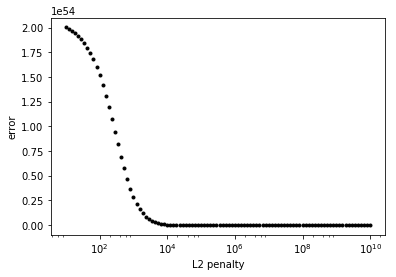

In [35]:
l2_penalty = val_err_dict.keys()
validation_error = val_err_dict.values()
l2_table = pd.DataFrame(list(val_err_dict.items()),columns=['l2_penalty','validation_error'])
plt.plot(l2_table['l2_penalty'],l2_table['validation_error'],'k.')
plt.xscale('log')
plt.xlabel('L2 penalty')
plt.ylabel('error')

Graph shows that error dramatically drops from $10^3$ to the $10^6$. We will reiterate in this domain:

In [36]:
val_err_dict = {}
for l2_penalty in np.logspace(5,6, num=100):
    val_err = k_fold_cross_validation(10, l2_penalty, poly_data)    
    val_err_dict[l2_penalty] = val_err

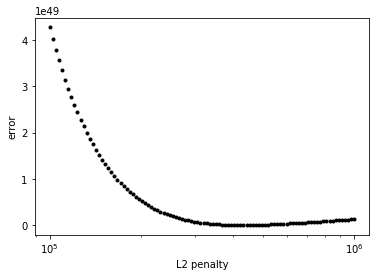

In [37]:
l2_penalty = val_err_dict.keys()
validation_error = val_err_dict.values()
l2_table = pd.DataFrame(list(val_err_dict.items()),columns=['l2_penalty','validation_error'])
plt.plot(l2_table['l2_penalty'],l2_table['validation_error'],'k.')
plt.xscale('log')
plt.xlabel('L2 penalty')
plt.ylabel('error')

Find the l2 value of minimizing error:

In [38]:
optimal_penalty = min(val_err_dict.items(), key = lambda x:x[1])
optimal_penalty[0]

432876.12810830615

Final model on all of the training data using the value of this optimal l2-penalty:

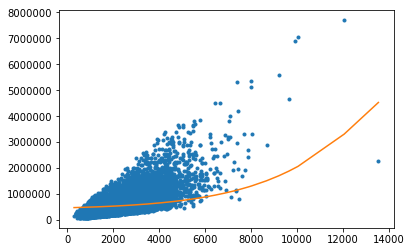

In [39]:
sales = sales.sort_values(['sqft_living','price'])
sales_data = polynomial_dataframe(sales['sqft_living'], 15)
sales_data['price'] = sales['price']
l2_penalty_best = optimal_penalty[0]
model_best = ridge_model(10, sales_data.drop('price',1), sales_data['price'])
plot_fitted_line(9,sales_data,model_best)

Calculate RSS on the Test data of the model with L2 penalty:

In [40]:
poly_test = polynomial_dataframe(test_data['sqft_living'], 15)
poly_test['price'] = test_data['price']
predictions = model_best.predict(poly_test.drop('price',1))
errors = predictions - test_data['price']
rss = (errors*errors).sum()
print("RSS with Optimal L2 penalty on Data set: %.4g" % rss)

RSS with Optimal L2 penalty on Data set: 2.298e+14
